# Proxyflow demo

### First computations

For this demo, we consider the simpler case (without faults) described in Appendix A.

In [19]:
### IMPORTS
import sys
sys.path.append('..')
import os
current_path = os.getcwd()
folder = os.path.abspath(os.path.join(current_path, os.pardir))
from classes.graph_simulation import SimWithoutFault
import matplotlib.pyplot as plt
import numpy as np

Parameters to be chosen. If data have already been generated once, the can be set to False.
- generate_MG_realisations : Generates 50 MG realisations for the simulation. Dependancies : gstools
- compute_modflow : Runs Modflow simulation. Dependancies : flopy
- build_graph : Generates graph from the model. Dependancies : igraph, Loopflow

In [20]:
### PARAMETERS
generate_MG_realisations = False
compute_modflow = True
build_graph = True

In [21]:
sim = SimWithoutFault(data_path=os.path.join(folder,'data/random_sim')) #class of computation
sim.generate_sim_data()
scenario = sim.instantiate_scenario(0) # a scenario is instantiated by its id (depending on the data) 
if generate_MG_realisations:
    sim.generate_MGS()
sim.generate_K_field(scenario)
if compute_modflow:
    sim.run_MODFLOW(scenario)

09-Jul-2024 (15:12:53) - MGS REAL0
09-Jul-2024 (15:12:58) - MGS REAL1
09-Jul-2024 (15:13:03) - MGS REAL2
09-Jul-2024 (15:13:08) - MGS REAL3
09-Jul-2024 (15:13:13) - MGS REAL4
09-Jul-2024 (15:13:18) - MGS REAL5
09-Jul-2024 (15:13:23) - MGS REAL6
09-Jul-2024 (15:13:28) - MGS REAL7
09-Jul-2024 (15:13:32) - MGS REAL8
09-Jul-2024 (15:13:37) - MGS REAL9
09-Jul-2024 (15:13:42) - MGS REAL10
09-Jul-2024 (15:13:47) - MGS REAL11
09-Jul-2024 (15:13:52) - MGS REAL12
09-Jul-2024 (15:13:57) - MGS REAL13
09-Jul-2024 (15:14:01) - MGS REAL14
09-Jul-2024 (15:14:06) - MGS REAL15
09-Jul-2024 (15:14:11) - MGS REAL16
09-Jul-2024 (15:14:16) - MGS REAL17
09-Jul-2024 (15:14:21) - MGS REAL18
09-Jul-2024 (15:14:26) - MGS REAL19
09-Jul-2024 (15:14:31) - MGS REAL20
09-Jul-2024 (15:14:35) - MGS REAL21
09-Jul-2024 (15:14:40) - MGS REAL22
09-Jul-2024 (15:14:45) - MGS REAL23
09-Jul-2024 (15:14:50) - MGS REAL24
09-Jul-2024 (15:14:55) - MGS REAL25
09-Jul-2024 (15:15:00) - MGS REAL26
09-Jul-2024 (15:15:05) - MGS REAL27
09

In [22]:
# loading different data
sim.load_hydro_data(scenario)
sim.load_graph(scenario)
sim.get_mass_data(scenario)

2024-07-09 15:18:25.073220 - LOADING K FIELD
2024-07-09 15:18:25.074407 - LOADING MODFLOW RESULTS
2024-07-09 15:18:25.097551 - LOADING GRAPH


True

In [23]:
### visualising MODFLOW plume
# sim.plot_plume_3D(scenario, visu = 'notebook')

In [24]:
### Building graph 
if build_graph:
    sim.build_graph(scenario)
sim.load_graph(scenario)

2024-07-09 15:18:27.071974 BUILDING GRAPH
Running topological_analysis version 0.1.19
2024-07-09 15:18:41.033819 GRAPH BUILT


In [25]:
### Computing Dijkstra

distances = sim.compute_dijkstra(scenario)

2024-07-09 15:18:41.269451 - COMPUTING DIJKSTRA WITH IGRAPH
2024-07-09 15:18:41.530183 - DIJKSTRA COMPUTED


Distance distribution is stored in scenario.ig_map. Modflow cumulative mass is in scenario.mf_map.

Text(0.5, 0, 'y')

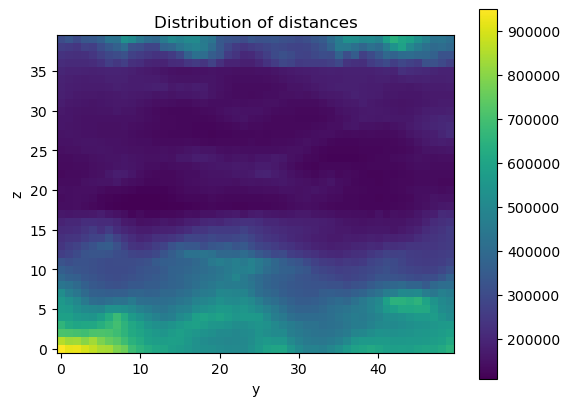

In [26]:
plt.imshow(scenario.ig_map, origin='lower')
plt.colorbar()
plt.title('Distribution of distances')
plt.ylabel('z')
plt.xlabel('y')

Text(0.5, 0, 'y')

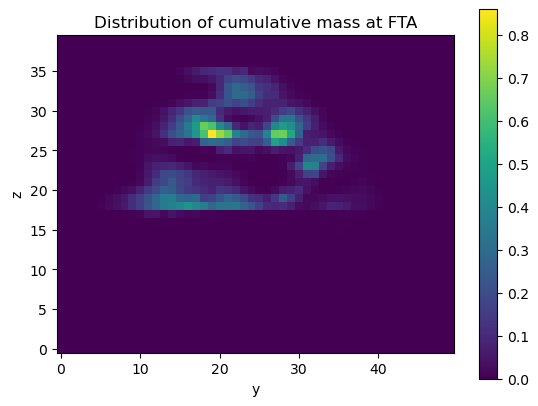

In [27]:
plt.imshow(scenario.mf_map, origin='lower')
plt.colorbar()
plt.title('Distribution of cumulative mass at FTA')
plt.ylabel('z')
plt.xlabel('y')

Correlation coefficients between two distributions.

In [28]:
pearson, spearman = sim.compute_Pearson(scenario), sim.compute_Spearman(scenario)
print(f'Pearson coefficient is {pearson}, Spearman coefficient is {spearman}')

Pearson coefficient is 0.293833435417422, Spearman coefficient is 0.9280716955179239


Similarity index is computed:

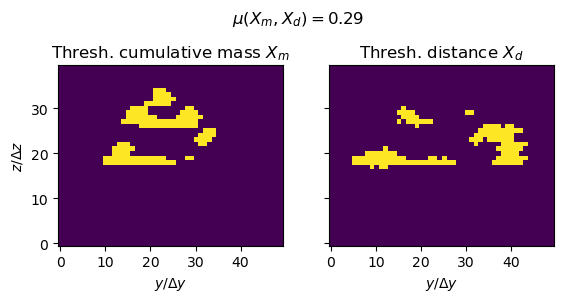

In [29]:
sim.compute_similarity(scenario,plot = True)

An idea of the possible auto-thresholding of the distances

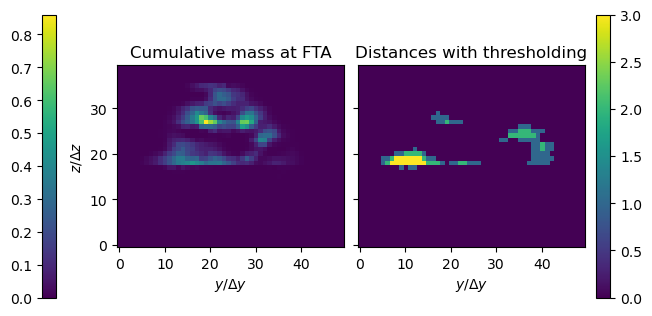

In [30]:
_ = sim.compute_auto_thresh(scenario, plot = True)

Finally, GraphSim.computes_data_dict provides some useful data about the simulation


In [31]:
sim.main(scenario, compute_data_dict  = True)

2024-07-09 15:18:42.901223 - LOADING K FIELD
2024-07-09 15:18:42.902094 - LOADING MODFLOW RESULTS
2024-07-09 15:18:42.928597 - COMPUTING DIJKSTRA WITH IGRAPH
2024-07-09 15:18:43.194465 - DIJKSTRA COMPUTED


{'id': 0,
 'success': True,
 'conc_max': 0.860075291934133,
 'min_distance': 109399.61397307088,
 't_sim': 518.0833333333335,
 'ctm_x': 1050.0,
 'ctm_y': 2550.0,
 'com_distance': 354.2087627217837,
 'var': 231077.5493712361,
 'jaccard_sim': 0.26666666666666666,
 'wass': 443.8912858845175,
 'NWD': 0.32040073034259015,
 'similarity': 0.2935336985046284,
 'Spearman': 0.9280716955179239,
 'Pearson': 0.293833435417422,
 'sum_mass': 52.88312719649438,
 'sum_dist': 547020114.7427081}

Method GraphSim.main makes it possible to call several methods at once. Here's an example :

In [32]:
sim.main(scenario, compute_similarity = True)

2024-07-09 15:18:43.199953 - LOADING K FIELD
2024-07-09 15:18:43.200578 - LOADING MODFLOW RESULTS
2024-07-09 15:18:43.227414 - COMPUTING DIJKSTRA WITH IGRAPH
2024-07-09 15:18:43.491365 - DIJKSTRA COMPUTED
2024-07-09 15:18:43.491398 - END


It is possible to call this function in parallel with the method GraphSim.parallel_computation, giving exactly the same arguments

In [33]:
list_scenario_ids = [0,1,2]
sim.scenarios = {}
result = sim.parallel_computation(list_scenario_ids, compute_data_dict = True)
print(result)

2024-07-09 15:18:44.346059 - LOADING K FIELD
2024-07-09 15:18:44.348869 - LOADING MODFLOW RESULTS
2024-07-09 15:18:44.352827 - LOADING K FIELD
2024-07-09 15:18:44.355138 - LOADING MODFLOW RESULTS
2024-07-09 15:18:44.359463 - LOADING K FIELD
2024-07-09 15:18:44.361638 - LOADING MODFLOW RESULTS
2024-07-09 15:18:44.425691 - LOADING GRAPH
2024-07-09 15:18:44.431285 - LOADING GRAPH
2024-07-09 15:18:44.436641 - LOADING GRAPH
2024-07-09 15:18:46.990501 - COMPUTING DIJKSTRA WITH IGRAPH
2024-07-09 15:18:47.021549 - COMPUTING DIJKSTRA WITH IGRAPH
2024-07-09 15:18:47.025968 - COMPUTING DIJKSTRA WITH IGRAPH
2024-07-09 15:18:47.952565 - DIJKSTRA COMPUTED
2024-07-09 15:18:47.990703 - DIJKSTRA COMPUTED
2024-07-09 15:18:48.044809 - DIJKSTRA COMPUTED
[{'id': 0, 'success': True, 'conc_max': 0.860075291934133, 'min_distance': 109399.61397307088, 't_sim': 518.0833333333335, 'ctm_x': 1050.0, 'ctm_y': 2550.0, 'com_distance': 354.2087627217837, 'var': 231077.5493712361, 'jaccard_sim': 0.26666666666666666, 'w